# Workgroup3
- Luis
- Álvaro
- Diego


## 1. What is Multicollinearity?


## 2. Analyzing RCT data with Precision Adjustment

Replicate the results of the script analyzing_rct_reemployment_experiment

In [7]:
import Pkg


#Pkg.add("DataFrames")
#Pkg.add("FilePaths")
#Pkg.add("Queryverse")
#Pkg.add("GLM")
#Pkg.add("StatsModels")
#Pkg.add("Combinatorics")
#Pkg.add("Iterators")
#Pkg.add("CategoricalArrays")
#Pkg.add("StatsBase")
#Pkg.add("Lasso")
#Pkg.add("TypedTables")
#Pkg.add("MacroTools")
#Pkg.add("NamedArrays")
#Pkg.add("DataTables")
#Pkg.add("Latexify")
#Pkg.add("PrettyTables")
#Pkg.add("TypedTables")
#Pkg.add("TexTables")
#Pkg.add("StatsModels")
#Pkg.add("DataTables")
#Pkg.add("FilePaths")
#Pkg.add("Combinatorics")
#Pkg.add("CategoricalArrays")
#Pkg.add("TypedTables")
#Pkg.add("MacroTools")

using GLM, StatsModels
using DataTables
using DelimitedFiles, DataFrames, Lasso
using FilePaths
using StatsModels, Combinatorics
using CategoricalArrays
using StatsBase, Statistics
using TypedTables
using MacroTools
using NamedArrays
using PrettyTables # Dataframe or Datatable to latex
using TexTables # pretty regression table and tex outcome

In [84]:
# Loading data

mat, head = readdlm("../../data/penn_jae.dat", header=true, Float64)
mat
df =DataFrame(mat, vec(head))
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,abdt,10693.6,10404.0,10691.0,10880.0,0,Float64
2,tg,2.56889,0.0,2.0,6.0,0,Float64
3,inuidur1,12.9148,1.0,10.0,52.0,0,Float64
4,inuidur2,12.1938,0.0,9.0,52.0,0,Float64
5,female,0.402142,0.0,0.0,1.0,0,Float64
6,black,0.116653,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363689,0.0,0.0,1.0,0,Float64
8,othrace,0.00575002,0.0,0.0,1.0,0,Float64
9,dep,0.444045,0.0,0.0,2.0,0,Float64


Focus on the Treatment group 2

In [85]:
# Filter control group and just treatment group number 2
#tg = treatment
penn = filter(row -> row[:tg] in [2,0], df)

describe(penn)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,abdt,10696.4,10404.0,10698.0,10880.0,0,Float64
2,tg,0.839848,0.0,0.0,2.0,0,Float64
3,inuidur1,13.0334,1.0,11.0,52.0,0,Float64
4,inuidur2,12.2511,0.0,10.0,52.0,0,Float64
5,female,0.400726,0.0,0.0,1.0,0,Float64
6,black,0.118817,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363196,0.0,0.0,1.0,0,Float64
8,othrace,0.00518852,0.0,0.0,1.0,0,Float64
9,dep,0.437911,0.0,0.0,2.0,0,Float64


In [86]:
#dummy for treatment
replace!(penn.tg, 2 => 1)
describe(penn)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,abdt,10696.4,10404.0,10698.0,10880.0,0,Float64
2,tg,0.419924,0.0,0.0,1.0,0,Float64
3,inuidur1,13.0334,1.0,11.0,52.0,0,Float64
4,inuidur2,12.2511,0.0,10.0,52.0,0,Float64
5,female,0.400726,0.0,0.0,1.0,0,Float64
6,black,0.118817,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363196,0.0,0.0,1.0,0,Float64
8,othrace,0.00518852,0.0,0.0,1.0,0,Float64
9,dep,0.437911,0.0,0.0,2.0,0,Float64


In [87]:
# change datatype for dep: string -> categorical
penn[!, :dep] = string.(penn[!,:dep])
penn[!, :dep] = categorical(penn[!,:dep])
describe(penn)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,abdt,10696.4,10404.0,10698.0,10880.0,0,Float64
2,tg,0.419924,0.0,0.0,1.0,0,Float64
3,inuidur1,13.0334,1.0,11.0,52.0,0,Float64
4,inuidur2,12.2511,0.0,10.0,52.0,0,Float64
5,female,0.400726,0.0,0.0,1.0,0,Float64
6,black,0.118817,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363196,0.0,0.0,1.0,0,Float64
8,othrace,0.00518852,0.0,0.0,1.0,0,Float64
9,dep,,0.0,,2.0,0,"CategoricalValue{String, UInt32}"


Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1

In [37]:
Pkg.add("Gadfly")
using Gadfly

   Resolving package versions...
   Installed Media ────────── v0.5.0
   Installed Hexagons ─────── v0.2.0
   Installed Loess ────────── v0.5.4
   Installed Juno ─────────── v0.8.4
   Installed IndirectArrays ─ v1.0.0
   Installed CoupledFields ── v0.2.0
   Installed Compose ──────── v0.9.3
   Installed Gadfly ───────── v1.3.4
    Updating `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  [c91e804a] + Gadfly v1.3.4
    Updating `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`
  [a81c6b42] + Compose v0.9.3
  [7ad07ef1] + CoupledFields v0.2.0
  [c91e804a] + Gadfly v1.3.4
  [a1b4810d] + Hexagons v0.2.0
  [9b13fd28] + IndirectArrays v1.0.0
  [e5e0dc1b] + Juno v0.8.4
  [4345ca2d] + Loess v0.5.4
  [e89f7d12] + Media v0.5.0
  [9abbd945] + Profile
Precompiling project...
  ✓ IndirectArrays
  ✓ Hexagons
  ✓ Loess
  ✓ Media
  ✓ CoupledFields
  ✓ Juno
  ✓ Compose
  ✓ Gadfly
  8 dependencies successfully precompiled in 9 seconds (295 already precompiled, 5 skipped during auto due to pr

In [68]:
#subset for treatment and for control
tg = filter(row -> row[:tg] in [1], penn)
cg = filter(row -> row[:tg] in [0], penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10824.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,2.0
2,10824.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10747.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0
4,10831.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,1.0
5,10845.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,0.0
6,10831.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0
7,10859.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,1.0
8,10516.0,0.0,15.0,15.0,1.0,0.0,0.0,0.0,0.0
9,10663.0,0.0,28.0,11.0,1.0,0.0,0.0,0.0,0.0


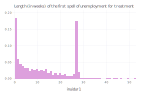

In [72]:
Gadfly.plot(tg, Coord.cartesian(xmin=0, xmax=52),
    layer(x = "inuidur1", Geom.histogram(bincount=52, density=true, limits=(min=0,)),
    color=[colorant"plum"]),
    Guide.title("Length (in weeks) of the first spell of unemployment for treatment")
)

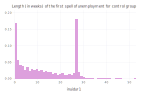

In [73]:
Gadfly.plot(cg, Coord.cartesian(xmin=0, xmax=52),
    layer(x = "inuidur1", Geom.histogram(bincount=52, density=true, limits=(min=0,)),
    color=[colorant"plum"]),
    Guide.title("Length (in weeks) of the first spell of unemployment for control group")
)
    #layer(x = "inuidur1", Geom.density , color=[colorant"black"]),

Carry out covariate balance check

In [88]:
# couples variables combinations 
    combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)

    # combinations without same couple
    expand_exp(args, deg::ConstantTerm) =
        tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

    StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
        apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

Run classical 2-sample approach, no adjustment (CL)